In [1]:
import os, json
import pandas as pd
import numpy as np

path_to_json = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/72'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files) 

['30.json']


In [2]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/72/'
for file in json_files:
    print(filepath + file)

/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/72/30.json


In [3]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/72/'

match_list=[]

for file in json_files:
    df_matches=pd.read_json(filepath + file)
    match_list.extend(df_matches['match_id'].values)

In [4]:
print(match_list)

[68311, 68357, 22933, 22940, 22943, 22944, 22945, 22949, 22956, 22963, 22961, 22964, 22966, 68344, 68345, 69163, 68346, 68355, 69301, 69137, 69208, 22936, 22973, 68337, 22981, 22974, 22924, 69321, 22983, 68312, 22921, 22926, 22930, 22934, 22939, 69202, 22942, 22948, 22955, 22962, 22980, 22984, 68338, 68343, 68362, 69191, 69188, 69199, 69258, 69284, 69205, 69161]


In [5]:
def dict_to_dataframe(a):
    dataframe = df_match[a].apply(pd.Series)
    dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
    return dataframe 

filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/72/'

appended_data = []

for file in json_files:
    df_match = pd.read_json(filepath + file)
    
    df_home_team = dict_to_dataframe("home_team")
    df_away_team = dict_to_dataframe("away_team")

    frames = [df_match, df_home_team, df_away_team]

    df = pd.concat(frames, axis = 1)

    df = df[['match_id', 'home_team_home_team_name', 'away_team_away_team_name']]
    appended_data.append(df)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data)

In [6]:
appended_data

,match_id,home_team_home_team_name,away_team_away_team_name
0,68311,Jamaica Women's,Australia Women's
1,68357,Norway Women's,Australia Women's
2,22933,Australia Women's,Italy Women's
3,22940,Argentina Women's,Japan Women's
4,22943,United States Women's,Thailand Women's
5,22944,Chile Women's,Sweden Women's
6,22945,Nigeria Women's,Korea Republic Women's
7,22949,Germany Women's,Spain Women's
8,22956,South Africa Women's,China PR Women's
9,22963,Jamaica Women's,Italy Women's


In [7]:
#temporary_match_list = [69225, 69212] #(27, 23/ (25, 23)/ (18, 23))


shot_appended_data = []
for match in match_list:

    filepath = "/Users/aritramajumdar/Downloads/statsbomb/open-data/data/events/"
    match_id = str(match)

    df = pd.read_json(filepath+match_id+".json")


    cols = ['tactics', 'related_events']
    df = df.drop(cols, axis = 1)


    def dict_to_dataframe(a):
        dataframe = df[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 


    df_type = dict_to_dataframe("type")
    df_possession_team = dict_to_dataframe("possession_team")
    df_play_pattern = dict_to_dataframe("play_pattern")
    df_team = dict_to_dataframe("team")
    df_player = dict_to_dataframe("player")
    df_position = dict_to_dataframe("position")
    df_pass = dict_to_dataframe("pass")
    df_shot = dict_to_dataframe("shot")


    
    a = ['type', 'possession_team', 'play_pattern', 'team',
       'player', 'position', 'pass', 'shot']

    df = df.drop(a, axis = 1)

    frames = [df_type, df_play_pattern, df_team,
             df_player, df_position, df_pass, df_shot, df_possession_team]

    df_total = pd.concat(frames, axis = 1)

    frames1 = [df, df_total]

    df_final = pd.concat(frames1, axis = 1)

    shot_col = [col for col in df_total if col.startswith('shot')]
    
    df_extra = df_final[['id', 'index', 'period', 'timestamp', 'minute', 
                     'second', 'possession', 'duration', 'location', 
                     'under_pressure', 'type_name', 'play_pattern_name',
                     'pass_height', 'pass_type', 'possession_team_name', 'player_id', 'player_name']]

    df_shot = df_final[shot_col]


    frames2 = [df_extra, df_shot]
    shots = pd.concat(frames2, axis = 1)

    b = ['shot_0','shot_key_pass_id']
    shots = shots.drop(b, axis = 1)


    def dict_to_dataframe(a):
        dataframe = shots[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 

    df_shot_type = dict_to_dataframe("shot_type")
    df_shot_technique = dict_to_dataframe("shot_technique")
    df_shot_outcome = dict_to_dataframe("shot_outcome")
    df_shot_body_part = dict_to_dataframe("shot_body_part")
    df_pass_height = dict_to_dataframe("pass_height")
    df_pass_type = dict_to_dataframe("pass_type")


    frames3 = [df_shot_type, df_shot_technique, df_shot_outcome, df_shot_body_part, df_pass_height, df_pass_type]

    df_shot_data = pd.concat(frames3, axis = 1)

    c = ["shot_type", "shot_technique", "shot_outcome", "shot_body_part", "pass_height", "pass_type"]

    shots = shots.drop(c, axis = 1)

    frames4 = [shots, df_shot_data]

    shots_data = pd.concat(frames4, axis=1)

    shots_data = shots_data[['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 
                             'possession_team_name', 'player_id', 'player_name',
                           'duration', 'location', 'under_pressure', 'type_name',
                            'play_pattern_name', 'pass_height_name',
                           'shot_end_location', 'shot_freeze_frame',
                           'shot_type_name', 'shot_technique_name', 
                           'shot_outcome_name', 'shot_body_part_name','shot_statsbomb_xg']]


    shots_data['previous_type_name'] = shots_data['type_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['pass_height_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['previous_pass_height_name'].ffill(axis = 0)

    shots_data = shots_data[shots_data['type_name'] == 'Shot']

    shots_data["location_x"] = shots_data["location"].str[0]
    shots_data["location_y"] = shots_data["location"].str[1]

    shots_data["shot_end_location_x"] = shots_data["shot_end_location"].str[0]
    shots_data["shot_end_location_y"] = shots_data["shot_end_location"].str[1]


    d = ['type_name', 'pass_height_name', 'location', 'shot_end_location']
    shots_data = shots_data.drop(d, axis = 1)  
    
    shots_data['match_id'] = int(match)
    shot_appended_data.append(shots_data)
    

shot_appended_data = pd.concat(shot_appended_data)

In [8]:
shots_data_final = pd.merge(shot_appended_data, appended_data, on='match_id')
shots_data_final['home_away'] = np.where((shots_data_final['possession_team_name'] == shots_data_final['home_team_home_team_name']), 
                                         'Home', 'Away')


#e = ['home_team_home_team_name', 'away_team_away_team_name']
#shots_data_final = shots_data_final.drop(e, axis = 1)

In [9]:
shots_data_final

,id,index,period,timestamp,minute,second,possession,possession_team_name,player_id,player_name,...,previous_type_name,previous_pass_height_name,location_x,location_y,shot_end_location_x,shot_end_location_y,match_id,home_team_home_team_name,away_team_away_team_name,home_away
0,56deeffa-ff55-429e-91df-41f237a3ebac,277,1,2022-11-23 00:04:49.357,4,49,12,Australia Women's,4961.0,Samantha May Kerr,...,Ball Receipt*,Ground Pass,103.7,46.3,115.4,43.2,68311,Jamaica Women's,Australia Women's,Away
1,00d9c066-1078-4e1c-8c7f-2ca299e3a5f0,484,1,2022-11-23 00:10:14.178,10,14,25,Australia Women's,4961.0,Samantha May Kerr,...,Duel,High Pass,107.4,37.4,120.0,37.3,68311,Jamaica Women's,Australia Women's,Away
2,48706448-928f-4721-96ec-2b813f448937,839,1,2022-11-23 00:18:12.068,18,12,38,Australia Women's,4961.0,Samantha May Kerr,...,Ball Receipt*,High Pass,108.5,48.1,120.0,32.9,68311,Jamaica Women's,Australia Women's,Away
3,718f8a06-078c-489e-9423-63d414be5e43,1151,1,2022-11-23 00:24:52.927,24,52,48,Australia Women's,4961.0,Samantha May Kerr,...,Ball Receipt*,High Pass,106.0,43.7,119.6,40.9,68311,Jamaica Women's,Australia Women's,Away
4,e1b29724-4861-4d12-9a51-ac6635e97438,1156,1,2022-11-23 00:25:27.514,25,27,49,Australia Women's,4961.0,Samantha May Kerr,...,Duel,High Pass,112.4,42.9,120.0,46.1,68311,Jamaica Women's,Australia Women's,Away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,3e767b66-7e5a-428e-a4a8-26af57a7639b,2060,2,2022-11-23 00:14:29.178,59,29,118,United States Women's,4949.0,Rosemary Kathleen Lavelle,...,Carry,Ground Pass,96.3,36.2,120.0,39.1,69161,Spain Women's,United States Women's,Away
1310,97ea84d3-d429-48a4-9664-a2c2d489da12,2212,2,2022-11-23 00:19:07.871,64,7,126,United States Women's,5087.0,Samantha June Mewis,...,Carry,Low Pass,98.5,24.3,120.0,47.1,69161,Spain Women's,United States Women's,Away
1311,746bc451-30af-477a-b824-293543017741,2228,2,2022-11-23 00:19:59.455,64,59,128,Spain Women's,25513.0,Lucía García Córdoba,...,Ball Receipt*,High Pass,102.9,54.6,120.0,45.1,69161,Spain Women's,United States Women's,Home
1312,a5a87567-a946-4860-9f5f-75436339c59d,2433,2,2022-11-23 00:30:36.196,75,36,138,United States Women's,8298.0,Megan Anna Rapinoe,...,Foul Won,Low Pass,108.0,40.0,120.0,36.3,69161,Spain Women's,United States Women's,Away


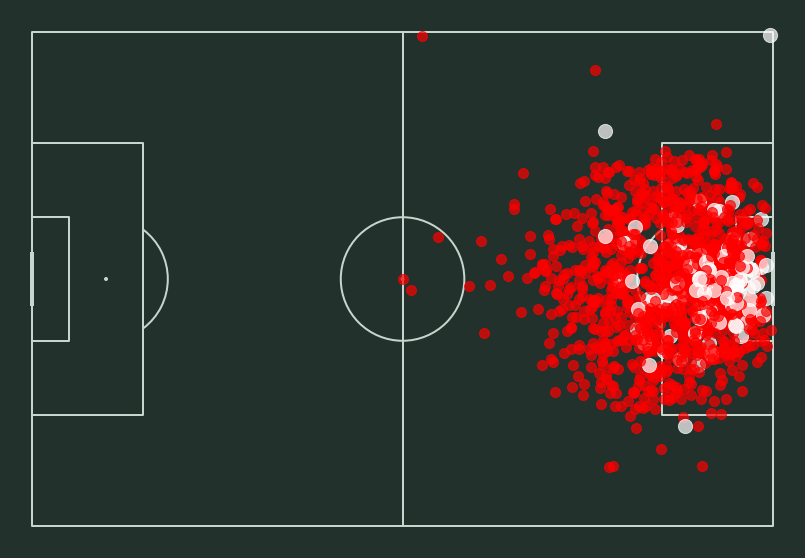

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch

fig, ax = plt.subplots(figsize=(20, 10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

"""
#The statsbomb pitch from mplsoccer
pitch = VerticalPitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, half = True)
"""
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', 
              figsize=(16, 11), constrained_layout=True, tight_layout=False)


pitch.draw(ax = ax)
plt.gca().invert_yaxis()

for x in range(len(shots_data_final['location_x'])):
    if shots_data_final['shot_outcome_name'].iloc[x] == 'Goal':
        #plt.plot((passes['x'].iloc[x],passes['end_x'].iloc[x]),(passes['y'].iloc[x],passes['end_y'].iloc[x]),color='green')
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'w', s=200, alpha = 0.7)
    else:
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'r', s=100, alpha = 0.7)
        
    

In [11]:
shots_data_final.to_excel("WWCUP.xlsx")